<a href="https://colab.research.google.com/github/ShivaniMohite1/CodeAlpha_Project_Name/blob/main/CodeAlpha_DS_Internship_3RD_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Code Alpha - Data Science Internship**

**3RD Internship Task - 2**

**Task 1 - DATA EXPLORATION**


* Load the Iris dataset and explore its structure.
* Check for missing values and handle them if
necessary.
* Visualize the data using plots and graphs to
understand the distribution of each feature.






In [ ]:
pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.5 MB/s eta 0:00:00


In [ ]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 9.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=bf02439823939a8977c3283dd3f1bbdfb9d033d30558eb3b4c294b7add72e2fc
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import scipy.stats as stats
import statsmodels.formula.api as smf
from lifelines import KaplanMeierFitter, NelsonAalenFitter, CoxPHFitter

# Supervised Classifier Models
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, mean_squared_error

# Unsupervised Models
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, NMF

In [ ]:
iris = pd.read_csv('/content/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Exploratory Data Analysis :-**

In [ ]:
sns.set_style('darkgrid')

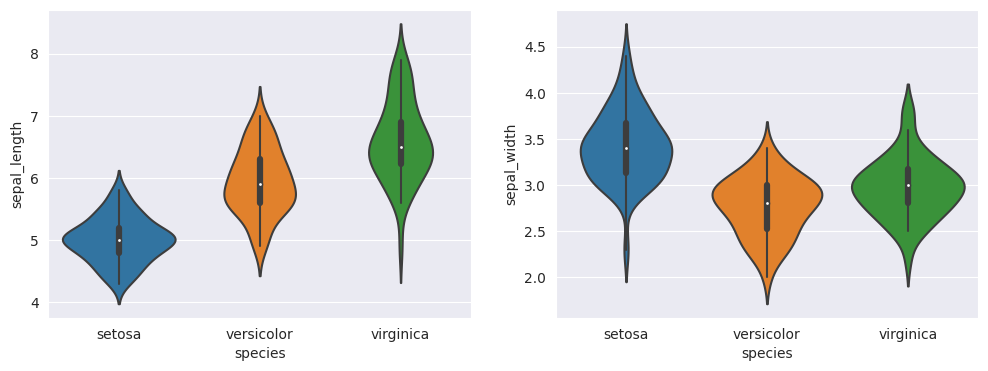

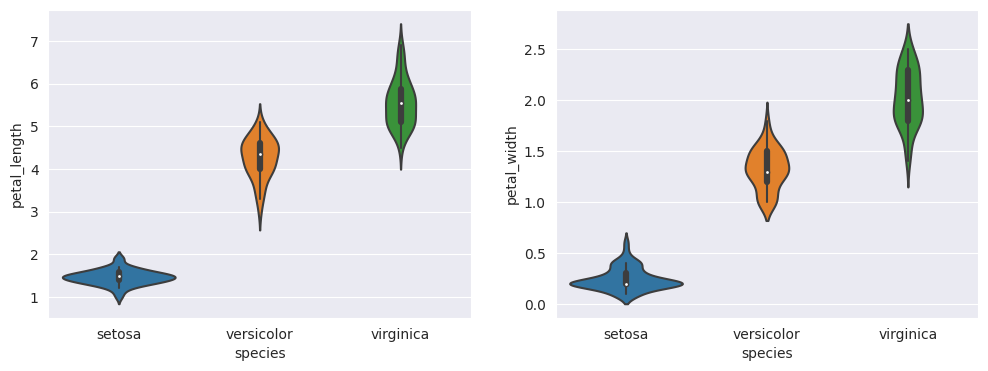

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (12, 4))

sns.violinplot(data = iris, x = 'species', y = 'sepal_length', ax = ax0)
sns.violinplot(data = iris, x = 'species', y = 'sepal_width', ax = ax1)
plt.show()

fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (12, 4))

sns.violinplot(data = iris, x = 'species', y = 'petal_length', ax = ax0)
sns.violinplot(data = iris, x = 'species', y = 'petal_width', ax = ax1)
plt.show()

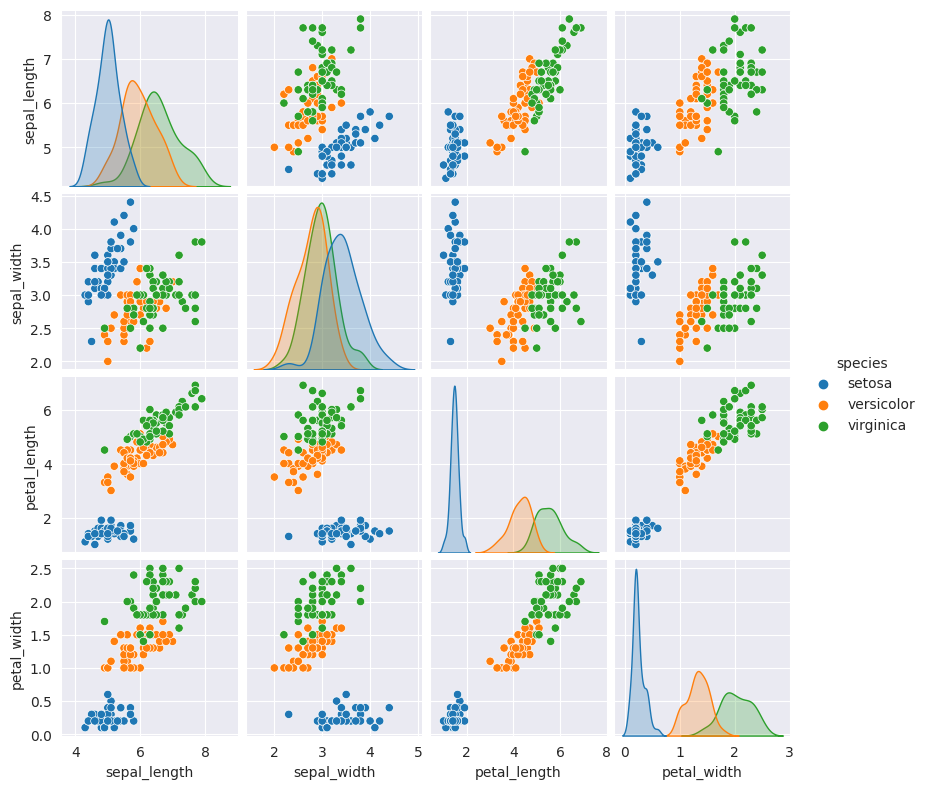

In [ ]:
sns.pairplot(data = iris, vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], hue = 'species',height = 2, aspect = 1)
plt.show()

**Data Pre - Processing :-**

In [ ]:
iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].var()

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

In [ ]:
X = iris.drop('species', axis = 1)
y = iris['species']

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
print('Corrected variance :')
X_scaled_df.var()

Corrected variance :


sepal_length    0.052908
sepal_width     0.032640
petal_length    0.089433
petal_width     0.101114
dtype: float64

**Split Data :-**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values, stratify = y, test_size = 0.2, random_state = 123)

In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 123)

**Supervised Classifier Models:-**

In [ ]:
knn = KNeighborsClassifier()
params = {'n_neighbors':np.arange(1, 21)}
knn_cv = GridSearchCV(knn, param_grid = params, cv = kf)
knn_cv.fit(X_train, y_train)
print('Best CV params :', knn_cv.best_params_)

Best CV params : {'n_neighbors': 9}


In [ ]:
print('Best CV accuracy score :', knn_cv.best_score_)

Best CV accuracy score : 0.9583333333333334


In [ ]:
logreg = LogisticRegression()
params = {'multi_class':['ovr', 'multinomial'], 'C':[0.001, 0.01, 0.1, 1, 10]}
logreg_cv = GridSearchCV(logreg, param_grid = params, cv = kf)
logreg_cv.fit(X_train, y_train)
print('Best CV params :', logreg_cv.best_params_)

Best CV params : {'C': 10, 'multi_class': 'multinomial'}


In [ ]:
print('Best CV accuracy score :', logreg_cv.best_score_)

Best CV accuracy score : 0.9583333333333334


In [ ]:
svc = SVC()
params = {'kernel':['linear', 'rbf'], 'C':[0.1, 1.0, 10], 'gamma':np.linspace(0.00001, 10, num = 7)}
svc_cv = GridSearchCV(svc, param_grid = params, cv = kf)
svc_cv.fit(X_train, y_train)
print('Best CV params :', svc_cv.best_params_)

Best CV params : {'C': 1.0, 'gamma': 3.33334, 'kernel': 'rbf'}


In [ ]:
print('Best CV accuracy score :', svc_cv.best_score_)


Best CV accuracy score : 0.975


In [ ]:
dt = DecisionTreeClassifier()
params = {'max_depth':np.arange(1, 11), 'min_samples_leaf':np.linspace(0.001, 0.250, num = 10)}
dt_cv = GridSearchCV(dt, param_grid = params, cv = kf)
dt_cv.fit(X_train, y_train)
print('Best CV params :', dt_cv.best_params_)

Best CV params : {'max_depth': 3, 'min_samples_leaf': 0.028666666666666667}


In [ ]:
dt = DecisionTreeClassifier()
params = {'max_depth':np.arange(1, 11), 'min_samples_leaf':np.linspace(0.001, 0.250, num = 10)}
dt_cv = GridSearchCV(dt, param_grid = params, cv = kf)
dt_cv.fit(X_train, y_train)
print('Best CV params :', dt_cv.best_params_)

Best CV params : {'max_depth': 3, 'min_samples_leaf': 0.028666666666666667}


In [ ]:
print('Best CV accuracy score :', dt_cv.best_score_)

Best CV accuracy score : 0.9583333333333333


**Ensemble Models :-**

1]Voting Classifier

2] Bagging Classifier

3] Random Forest Classifier

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors = 9)
logreg_best = LogisticRegression(C = 10, multi_class = 'multinomial')
svc_best = SVC(kernel = 'rbf', C = 1.0, gamma = 3.33334)
dt_best = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 0.028666666666666667)

classifiers = [('KNeighborsClassifier', knn_best),
               ('LogisticRegression', logreg_best),
               ('SVC', svc_best),
               ('DecisionTreeClassifier', dt_best)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
vc_accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier accuracy score :', vc_accuracy)

Voting Classifier accuracy score : 0.9333333333333333


In [ ]:
bc = BaggingClassifier(estimator = svc_best, n_estimators = 50, random_state = 123)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
bc_accuracy = accuracy_score(y_test, y_pred)
print('Bagging Classifier accuracy score :', bc_accuracy)

Bagging Classifier accuracy score : 0.9333333333333333


In [ ]:
rf = RandomForestClassifier(n_estimators = 400, max_depth = 3, min_samples_leaf = 0.028666666666666667, random_state = 123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print('Random Forest Classifier accuracy score :', rf_accuracy)

Random Forest Classifier accuracy score : 0.9333333333333333


**Evaluate Ensemble Models Performance :-**

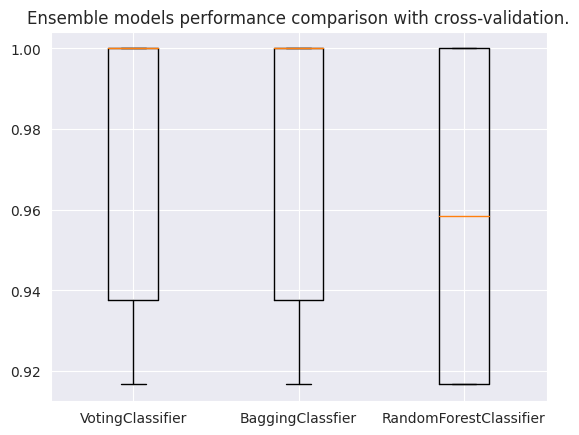

In [ ]:
ensembles = {'VotingClassifier':vc,
             'BaggingClassfier':bc,
             'RandomForestClassifier':rf}
results = []
for model in ensembles.values() :
    kf = KFold(n_splits = 10, shuffle = True, random_state = 123)
    cv = cross_val_score(model, X_train, y_train, cv = kf)
    results.append(cv)
plt.boxplot(results, labels = ensembles.keys())
plt.title('Ensemble models performance comparison with cross-validation.')
plt.show()

In [ ]:
for name, model in ensembles.items() :
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)


    print('{} test set accuracy score : {}'.format(name, accuracy))
    print(classification_report(y_test, y_pred))
    print()

VotingClassifier test set accuracy score : 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.80      0.89        10
   virginica       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


BaggingClassfier test set accuracy score : 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.80      0.89        10
   virginica       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


RandomForestClassifier test set accuracy score : 0.9333333333333333
              precision    recall  f1-score 

**Unsupervised Model:-**

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
samples = iris.drop('species', axis = 1)
samples_array = iris.drop('species', axis = 1).values

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
samples_scaled = scaler.fit_transform(samples_array)

In [ ]:
samples_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

**Clustering :-**

**1] K-Means Clustering -**

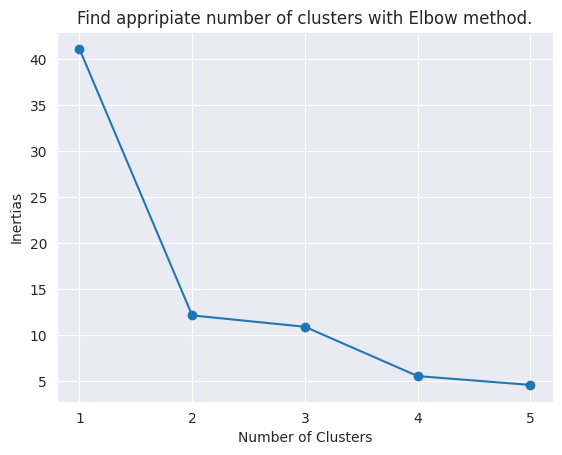

In [ ]:
ks = np.arange(1, 6)
inertias = []
for k in ks :
    model = KMeans(n_clusters = k, n_init = 'auto')
    model.fit(samples_scaled)
    inertias.append(model.inertia_)
plt.plot(ks, inertias, '-o')
plt.title('Find appripiate number of clusters with Elbow method.')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertias')
plt.xticks(ks)
plt.show()

In [ ]:
km = KMeans(n_clusters = 3, n_init = 'auto')
km.fit(samples_scaled)
labels = km.predict(samples_scaled)
print('Predicted clusters :')
labels

Predicted clusters :


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

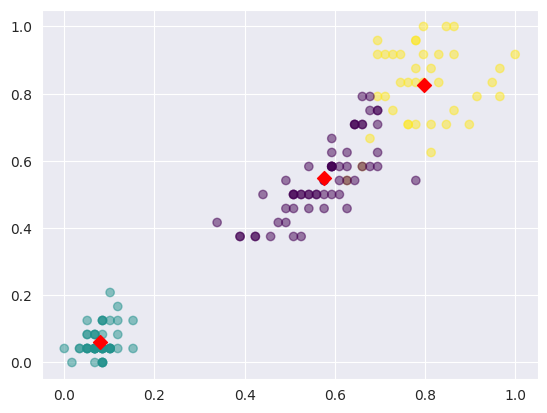

In [ ]:
x = samples_scaled[:, 2] # petal_lenght
y = samples_scaled[:, 3] # petal_width
plt.scatter(x, y, c = labels, alpha = 0.5, cmap = 'viridis')

centroids = km.cluster_centers_
centroids_x = centroids[:, 2]
centroids_y = centroids[:, 3]
plt.scatter(centroids_x, centroids_y, marker = 'D', s = 50, c = 'red')
plt.show()

In [ ]:
print('Centroids of 4 dimensions and 3 clusters :')
centroids

Centroids of 4 dimensions and 3 clusters :


array([[0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.19611111, 0.59083333, 0.07864407, 0.06      ],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

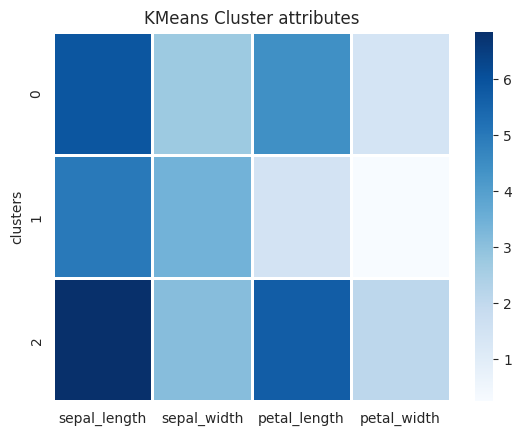

In [ ]:
samples['clusters'] = labels
sns.heatmap(samples.groupby('clusters').mean(), cmap = 'Blues', linewidth = 1)
plt.title('KMeans Cluster attributes')
plt.show()

**2] Hierarchical Clustering :-**

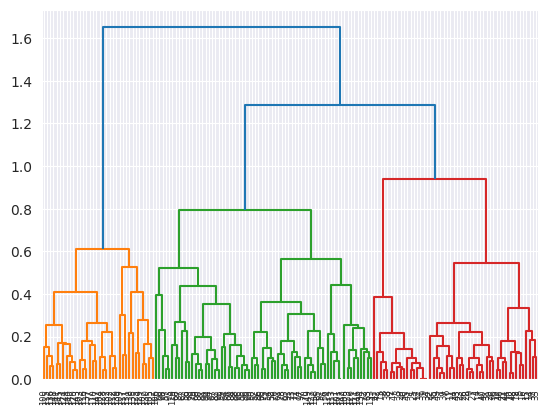

In [ ]:
mergings = linkage(samples_scaled, method = 'complete')
dendrogram(mergings, leaf_rotation = 90, leaf_font_size = 6, labels = iris.index)
plt.show()

In [ ]:
labels = fcluster(mergings, 1.2, criterion = 'distance')
print(labels)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 2 1 1
 2 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [ ]:
samples = iris.drop('species', axis = 1)
samples['hierarchy_clusters'] = labels
samples

,sepal_length,sepal_width,petal_length,petal_width,hierarchy_clusters
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,3
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,3
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


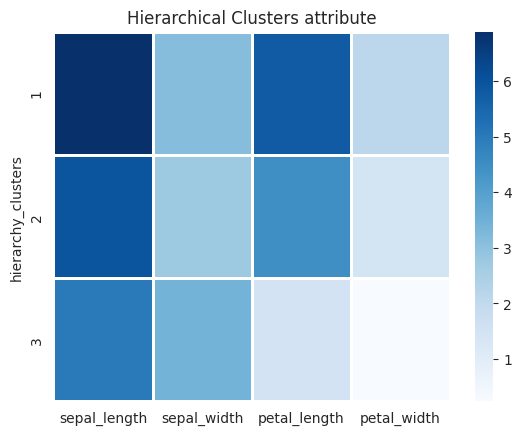

In [ ]:
sns.heatmap(samples.groupby('hierarchy_clusters').mean(), cmap = 'Blues', linewidth = 1)
plt.title('Hierarchical Clusters attribute')
plt.show()